# Finding a Shell Gas Station

### Introduction/Business problems

The City of New York is one of the major city in United States of America and the city is the center of the New York metropolitan area, the largest metropolitan area in the world by urban landmass. New York City consists of five boroughs, each of which is a separate county of the State of New York. The five boroughs – Brooklyn, Queens, Manhattan, The Bronx, and Staten Island. The city has over 120 colleges and universities, including Columbia University, New York University, and Rockefeller University, ranked among the top universities in the world. Anchored by Wall Street in the Financial District of Lower Manhattan, New York has been called both the most economically powerful city and world's leading financial center, and is home to the world's two largest stock exchanges by total market capitalization, the New York Stock Exchange and NASDAQ. New York City is home to more than 3.2 million residents born outside the United States, the largest foreign-born population of any city in the world. New York City is a global hub of business and commerce, as a center for banking and finance, retailing, world trade, transportation, tourism, real estate, new media, traditional media, advertising, legal services, accountancy, insurance, theater, fashion, and the arts in the United States; while Silicon Alley, metonymous for New York's broad-spectrum high technology sphere, continues to expand. Many Fortune 500 corporations are headquartered in New York City, as are a large number of multinational corporations. One out of ten private sector jobs in the city is with a foreign company.

People work here day and night and this city is known for its night life. Most of the people uses vehicle to move around the city.

So as part of this Project we will be finding a gas station in all parts of new york city.

### Data collection

For this project we need following data:

1. Newyork city data that has list of Boroughs, Neighborhoods along with their latitude and longitude.
   - Data Source: https://cocl.us/new_york_dataset
   - Description: This data set contains the information about the variuos parts of New York city.
   
2. Shell Gas stations in each Neighborhood of New York city.
   - Data Source: https://foursquare.com/
   - Description: By using this API we will get the venues in each neighborhood, and filter venues to get only gas stations.
   
3. Geospace data.
   - Data Source: https://data.cityofnewyork.us/City-Government/Borough-Boundaries/tqmj-j8zm
   - Description: By using this link it will be helpful for us to get Borugh boundaries to visualise chloropeth map.

### Analysis

We will import the reuied libraries for Python.

In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import requests
from bs4 import BeautifulSoup
!conda install -c conda-forge geocoder --yes 
import geocoder
import os
!conda install -c conda-forge folium=0.5.0 --yes
import folium
!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
%matplotlib inline

print('Libraries Imported')

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - geocoder


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ratelim-0.1.6              |             py_2           6 KB  conda-forge
    geocoder-1.38.1            |             py_1          53 KB  conda-forge
    ca-certificates-2019.11.28 |       hecc5488_0         145 KB  conda-forge
    openssl-1.1.1d             |       h516909a_0         2.1 MB  conda-forge
    certifi-2019.11.28         |           py36_0         149 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         2.4 MB

The following NEW packages will be INSTALLED:

    geocoder:        1.38.1-py_1       conda-forge
    ratelim:         0.1.6-py_2        conda-forge

The following packages will be UPDATED:

    

In [41]:
CLIENT_ID = 'XSSZFWEP5UHSX5E1XMBX5MNTUNBMXDOPCN2ZLMQJI1VFUHLM' # your Foursquare ID
CLIENT_SECRET = '0GWNHYLYDWK2NANGRAFQF0TMU3Y12M1OTGDTE3HWO4A2CQKN' # your Foursquare Secret
VERSION = '20180604'
LIMIT = 30
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: XSSZFWEP5UHSX5E1XMBX5MNTUNBMXDOPCN2ZLMQJI1VFUHLM
CLIENT_SECRET:0GWNHYLYDWK2NANGRAFQF0TMU3Y12M1OTGDTE3HWO4A2CQKN


Now lets define a function to get geocodes of given location using geopy.

In [42]:
def geo_location(address):
    geolocator = Nominatim(user_agent = "ny_explorer")
    location = geolocator.geocode(address)
    latitude = location.latitude
    longitude = location.longitude
    return latitude, longitude

To get top 50 gas stations within the radius of 1000 meters for a given latitude and longitude.

In [43]:
def get_venues(lat,lng):
    
    radius = 1000
    LIMIT = 50
    CLIENT_ID = os.environ['XSSZFWEP5UHSX5E1XMBX5MNTUNBMXDOPCN2ZLMQJI1VFUHLM'] # your Foursquare ID
    CLIENT_SECRET = os.environ['0GWNHYLYDWK2NANGRAFQF0TMU3Y12M1OTGDTE3HWO4A2CQKN'] # your Foursquare Secret
    VERSION = '20180604' #Foursquare API version
    
    url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(
        CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT) # to fetch the data from foursquare API

    # to get all the data
    results = requests.get(url).json()
    venue_data = results['response']['groups'][0]['itmes']
    venue_details = []
    for row in venue_data:
        try:
            venue_id = row['venue']['id']
            venue_name = row['venue']['name']
            venue_category = row['venue']['categories'][0]['name']
            venue_details.append([venue_id, venue_name, venue_category])
        except KeyError:
            pass
        column_names = ['ID','Name', 'Likes', 'Rating', 'Tips']
        df = pd.DataFrame(Venue_details, column = column_names)
        return df  

We will define a function to get venue details like count, rating, tips

In [44]:
def get_venues_details(lat,lng):
    
    radius = 1000
    LIMIT = 50
    CLIENT_ID = os.environ['XSSZFWEP5UHSX5E1XMBX5MNTUNBMXDOPCN2ZLMQJI1VFUHLM'] # your Foursquare ID
    CLIENT_SECRET = os.environ['0GWNHYLYDWK2NANGRAFQF0TMU3Y12M1OTGDTE3HWO4A2CQKN'] # your Foursquare Secret
    VERSION = '20180604' #Foursquare API version
    
    url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(
        CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT) # to fetch the data from foursquare API

    # to get all the data
    results = requests.get(url).json()
    venue_data = ['response']['venue']
    venue_details = []
    try:
        venue_id = Venue_data['id']
        venue_name = Venue_data['name']
        venue_likes = venue_data['likes']['count']
        venue_rating = venue_data['rating']
        venue_tips = venue_data['tips']['count']
        venue_details.append([venue_id, venue_name, venue_likes, venue_rating, venue_tips])
    except KeyError:
        pass
    column_names = ['ID','Name', 'Likes', 'Rating', 'Tips']
    df = pd.DataFrame(Venue_details, column = column_names)
    return df    

In [45]:
#To get the newyork city data:

def get_new_york_data():
    url = 'https://cocl.us/new_york_dataset'
    resp = requests.get(url).json()
    features = resp['features']
    
    #To define dataframe columns:
    column_names = ['Borough','Neighborhood','Latitude','Longitude']
    new_york_data = pd.DataFrame(columns=column_names)
    for data in features:
        borough = data['properties']['borough']
        neighborhood_name = data['properties']['name']
        
        neighborhood_latlon = data['geometry']['coordinates']
        neighborhood_lat = neighborhood_latlon[1]
        neighborhood_lon = neighborhood_latlon[0]
        new_york_data = new_york_data.append({'Borough':borough, 'Neighborhood': neighborhood_name, 'Latitude': neighborhood_lat, 'Longitude':neighborhood_lon}, ignore_index=True)
        
    return new_york_data

In [59]:
new_york_data = get_new_york_data()

In [60]:
new_york_data.head()

,Borough,Neighborhood,Latitude,Longitude
0,Bronx,Wakefield,40.894705,-73.847201
1,Bronx,Co-op City,40.874294,-73.829939
2,Bronx,Eastchester,40.887556,-73.827806
3,Bronx,Fieldston,40.895437,-73.905643
4,Bronx,Riverdale,40.890834,-73.912585


In [61]:
new_york_data.shape

(306, 4)

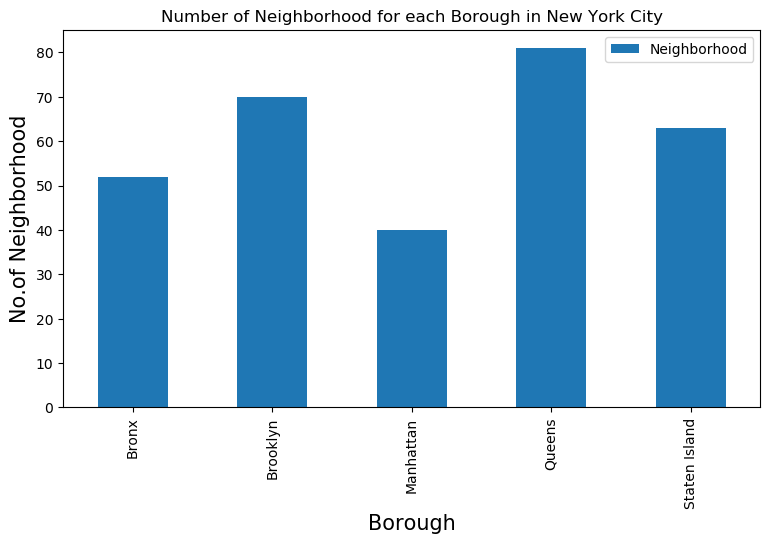

In [62]:
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('Number of Neighborhood for each Borough in New York City')
#On x-axis
plt.xlabel('Borough', fontsize = 15)
#On y-axis
plt.ylabel('No.of Neighborhood', fontsize=15)
#giving a bar plot
new_york_data.groupby('Borough')['Neighborhood'].count().plot(kind='bar')
#legend
plt.legend()
#displays the plot
plt.show()

In [63]:
CLIENT_ID = 'XSSZFWEP5UHSX5E1XMBX5MNTUNBMXDOPCN2ZLMQJI1VFUHLM' # your Foursquare ID
CLIENT_SECRET = '0GWNHYLYDWK2NANGRAFQF0TMU3Y12M1OTGDTE3HWO4A2CQKN' # your Foursquare Secret
VERSION = '20180604'
LIMIT = 30
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: XSSZFWEP5UHSX5E1XMBX5MNTUNBMXDOPCN2ZLMQJI1VFUHLM
CLIENT_SECRET:0GWNHYLYDWK2NANGRAFQF0TMU3Y12M1OTGDTE3HWO4A2CQKN


In [67]:
search_query = 'Gas station'
radius = 5000
print(search_query + ' .... OK!')

Gas station .... OK!


In [68]:
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, Latitude, Longitude, VERSION, search_query, radius, LIMIT)
url

'https://api.foursquare.com/v2/venues/search?client_id=XSSZFWEP5UHSX5E1XMBX5MNTUNBMXDOPCN2ZLMQJI1VFUHLM&client_secret=0GWNHYLYDWK2NANGRAFQF0TMU3Y12M1OTGDTE3HWO4A2CQKN&ll=40.89470517661,-73.84720052054902&v=20180604&query=Gas station&radius=5000&limit=30'

In [69]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5de77dc13907e70022092bc7'},
 'response': {'venues': [{'id': '4b5948b7f964a520f68328e3',
    'name': 'Mobil Gas Station',
    'location': {'address': '4090 Boston Rd #US1',
     'lat': 40.88577,
     'lng': -73.82807,
     'labeledLatLngs': [{'label': 'display',
       'lat': 40.88577,
       'lng': -73.82807}],
     'distance': 1892,
     'postalCode': '10475',
     'cc': 'US',
     'city': 'Bronx',
     'state': 'NY',
     'country': 'United States',
     'formattedAddress': ['4090 Boston Rd #US1',
      'Bronx, NY 10475',
      'United States']},
    'categories': [{'id': '4bf58dd8d48988d113951735',
      'name': 'Gas Station',
      'pluralName': 'Gas Stations',
      'shortName': 'Gas Station',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/shops/gas_',
       'suffix': '.png'},
      'primary': True}],
    'referralId': 'v-1575452141',
    'hasPerk': False},
   {'id': '552a1015498ea4c61d28b73e',
    'name': 'Ultimate Gas Stati

In [70]:
# assign relevant part of JSON to venues
from pandas.io.json import json_normalize
venues = results['response']['venues']

# tranform venues into a dataframe
dataframe = json_normalize(venues)
dataframe.head()

,categories,hasPerk,id,location.address,location.cc,location.city,location.country,location.crossStreet,location.distance,location.formattedAddress,location.labeledLatLngs,location.lat,location.lng,location.neighborhood,location.postalCode,location.state,name,referralId,venuePage.id
0,"[{'id': '4bf58dd8d48988d113951735', 'name': 'G...",False,4b5948b7f964a520f68328e3,4090 Boston Rd #US1,US,Bronx,United States,NaN,1892,"[4090 Boston Rd #US1, Bronx, NY 10475, United ...","[{'label': 'display', 'lat': 40.88577, 'lng': ...",40.885770,-73.828070,NaN,10475,NY,Mobil Gas Station,v-1575452141,NaN
1,"[{'id': '4bf58dd8d48988d113951735', 'name': 'G...",False,552a1015498ea4c61d28b73e,140 W Sanford Bl,US,Mount Vernon,United States,S 10 St.,856,"[140 W Sanford Bl (S 10 St.), Mount Vernon, NY...","[{'label': 'display', 'lat': 40.8982813234268,...",40.898281,-73.838193,NaN,NaN,NY,Ultimate Gas Station,v-1575452141,NaN
2,"[{'id': '4bf58dd8d48988d113951735', 'name': 'G...",False,5db37cc0a168b700089de55d,612 E. 234th St,US,Bronx,United States,Bronx Boulevard,1140,"[612 E. 234th St (Bronx Boulevard), Bronx, NY ...","[{'label': 'display', 'lat': 40.895065, 'lng':...",40.895065,-73.860740,NaN,10466,NY,Gulf Gas Station,v-1575452141,NaN
3,"[{'id': '4bf58dd8d48988d113951735', 'name': 'G...",False,4d634a3703e2721e48b10c2f,4234 Bronx Blvd,US,Bronx,United States,NaN,1312,"[4234 Bronx Blvd, Bronx, NY 10466, United States]","[{'label': 'display', 'lat': 40.89518848444197...",40.895188,-73.862790,NaN,10466,NY,Ultimate Gas Station,v-1575452141,NaN
4,"[{'id': '4bf58dd8d48988d113951735', 'name': 'G...",False,4d44971814aa8cfa4b9b683d,520 S 4th Ave,US,Mount Vernon,United States,sandford blvd,1354,"[520 S 4th Ave (sandford blvd), Mount Vernon, ...","[{'label': 'display', 'lat': 40.89942550766477...",40.899426,-73.832369,NaN,10550,NY,Mauro's Service(Gulf Gas Station ),v-1575452141,NaN


In [71]:
# keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
dataframe_filtered = dataframe.loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
dataframe_filtered['categories'] = dataframe_filtered.apply(get_category_type, axis=1)

# clean column names by keeping only last term
dataframe_filtered.columns = [column.split('.')[-1] for column in dataframe_filtered.columns]

dataframe_filtered

,name,categories,address,cc,city,country,crossStreet,distance,formattedAddress,labeledLatLngs,lat,lng,neighborhood,postalCode,state,id
0,Mobil Gas Station,Gas Station,4090 Boston Rd #US1,US,Bronx,United States,NaN,1892,"[4090 Boston Rd #US1, Bronx, NY 10475, United ...","[{'label': 'display', 'lat': 40.88577, 'lng': ...",40.885770,-73.828070,NaN,10475,NY,4b5948b7f964a520f68328e3
1,Ultimate Gas Station,Gas Station,140 W Sanford Bl,US,Mount Vernon,United States,S 10 St.,856,"[140 W Sanford Bl (S 10 St.), Mount Vernon, NY...","[{'label': 'display', 'lat': 40.8982813234268,...",40.898281,-73.838193,NaN,NaN,NY,552a1015498ea4c61d28b73e
2,Gulf Gas Station,Gas Station,612 E. 234th St,US,Bronx,United States,Bronx Boulevard,1140,"[612 E. 234th St (Bronx Boulevard), Bronx, NY ...","[{'label': 'display', 'lat': 40.895065, 'lng':...",40.895065,-73.860740,NaN,10466,NY,5db37cc0a168b700089de55d
3,Ultimate Gas Station,Gas Station,4234 Bronx Blvd,US,Bronx,United States,NaN,1312,"[4234 Bronx Blvd, Bronx, NY 10466, United States]","[{'label': 'display', 'lat': 40.89518848444197...",40.895188,-73.862790,NaN,10466,NY,4d634a3703e2721e48b10c2f
4,Mauro's Service(Gulf Gas Station ),Gas Station,520 S 4th Ave,US,Mount Vernon,United States,sandford blvd,1354,"[520 S 4th Ave (sandford blvd), Mount Vernon, ...","[{'label': 'display', 'lat': 40.89942550766477...",40.899426,-73.832369,NaN,10550,NY,4d44971814aa8cfa4b9b683d
5,Gulf Gas Station,Gas Station,NaN,US,NaN,United States,NaN,4309,"[New York, United States]","[{'label': 'display', 'lat': 40.873301, 'lng':...",40.873301,-73.889864,NaN,NaN,New York,4e58363552b1748f8073a447
6,Citgo Gas Station,Gas Station,NaN,US,Mount Vernon,United States,NaN,1714,"[Mount Vernon, NY 10550, United States]","[{'label': 'display', 'lat': 40.90825554693626...",40.908256,-73.837510,NaN,10550,NY,50d8ca16e4b0e2534815b75d
7,Gulf Gas Station,Gas Station,45 W Broad St,US,Mount Vernon,United States,NaN,3599,"[45 W Broad St, Mount Vernon, NY 10552, United...","[{'label': 'display', 'lat': 40.92626706683504...",40.926267,-73.837893,NaN,10552,NY,4c825940d8086dcb864b7552
8,Gas Station,Gas Station,NaN,US,Mount Vernon,United States,NaN,2558,"[Mount Vernon, NY 10550, United States]","[{'label': 'display', 'lat': 40.917194, 'lng':...",40.917194,-73.840908,NaN,10550,NY,4f4128bfe4b0d98870944169
9,76 Gas Station,Gas Station,920 McLean Ave,US,Yonkers,United States,NaN,2033,"[920 McLean Ave, Yonkers, NY 10704, United Sta...","[{'label': 'display', 'lat': 40.90432701153566...",40.904327,-73.867747,NaN,10704,NY,4e7d1e20e5fae91b3a398878


In [72]:
dataframe_filtered.shape

(30, 16)

Let's visualize the gas stations that are nearby

In [73]:
dataframe_filtered.name

0                      Mobil Gas Station
1                   Ultimate Gas Station
2                       Gulf Gas Station
3                   Ultimate Gas Station
4     Mauro's Service(Gulf Gas Station )
5                       Gulf Gas Station
6                      Citgo Gas Station
7                       Gulf Gas Station
8                            Gas Station
9                         76 Gas Station
10                      Gulf Gas Station
11                      Gulf Gas Station
12                     Mobil Gas Station
13                      Gulf Gas Station
14                     Getty Gas Station
15                     Prime Gas Station
16                           Gas Station
17                      Gulf Gas Station
18                     Citgo Gas Station
19                     Mobil gas station
20                        76 Gas Station
21                     Getty Gas Station
22                  Ultimate Gas Station
23                     Getty Gas Station
24              

In [76]:
venues_map = folium.Map(location=[Latitude, Longitude], zoom_start=13) # generate map centred around the Central park

# add a red circle marker to represent the Conrad Hotel
folium.features.CircleMarker(
    [Latitude, Longitude],
    radius=10,
    color='red',
    popup='central park',
    fill = True,
    fill_color = 'red',
    fill_opacity = 0.6
).add_to(venues_map)

# add the gas stationss as blue circle markers
for lat, lng, label in zip(dataframe_filtered.lat, dataframe_filtered.lng, dataframe_filtered.categories):
    folium.features.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(venues_map)

# display map
venues_map

Let's explore the closest gas station

In [77]:
venue_id = '4e58363552b1748f8073a447' # ID of Gulf gas station
url = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(venue_id, CLIENT_ID, CLIENT_SECRET, VERSION)
url

'https://api.foursquare.com/v2/venues/4e58363552b1748f8073a447?client_id=XSSZFWEP5UHSX5E1XMBX5MNTUNBMXDOPCN2ZLMQJI1VFUHLM&client_secret=0GWNHYLYDWK2NANGRAFQF0TMU3Y12M1OTGDTE3HWO4A2CQKN&v=20180604'

In [78]:
result = requests.get(url).json()
print(result['response']['venue'].keys())
result['response']['venue']

dict_keys(['id', 'name', 'contact', 'location', 'canonicalUrl', 'categories', 'verified', 'stats', 'likes', 'dislike', 'ok', 'allowMenuUrlEdit', 'beenHere', 'specials', 'photos', 'reasons', 'hereNow', 'createdAt', 'tips', 'shortUrl', 'timeZone', 'listed', 'pageUpdates', 'inbox', 'attributes', 'bestPhoto'])


{'id': '4e58363552b1748f8073a447',
 'name': 'Gulf Gas Station',
 'contact': {},
 'location': {'lat': 40.873301,
  'lng': -73.889864,
  'labeledLatLngs': [{'label': 'display',
    'lat': 40.873301,
    'lng': -73.889864}],
  'cc': 'US',
  'state': 'New York',
  'country': 'United States',
  'formattedAddress': ['New York', 'United States']},
 'canonicalUrl': 'https://foursquare.com/v/gulf-gas-station/4e58363552b1748f8073a447',
 'categories': [{'id': '4bf58dd8d48988d113951735',
   'name': 'Gas Station',
   'pluralName': 'Gas Stations',
   'shortName': 'Gas Station',
   'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/shops/gas_',
    'suffix': '.png'},
   'primary': True}],
 'verified': False,
 'stats': {'tipCount': 0},
 'likes': {'count': 1,
  'groups': [{'type': 'others',
    'count': 1,
    'items': [{'id': '2280416',
      'firstName': 'Marthum',
      'lastName': 'Brown-Tulloch',
      'gender': 'male',
      'photo': {'prefix': 'https://fastly.4sqi.net/img/user/',
       

Checking with rating, tips and likes

In [79]:
try:
    print(result['response']['venue']['rating'])
except:
    print('This venue has not been rated yet.')

This venue has not been rated yet.


In [81]:
venue_id = '4bc8c15b14d7952184c769e9' # ID of Mobil gas station
url = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(venue_id, CLIENT_ID, CLIENT_SECRET, VERSION)

result = requests.get(url).json()
try:
    print(result['response']['venue']['rating'])
except:
    print('This venue has not been rated yet.')

6.5


In [82]:
result['response']['venue']['tips']['count']

1

In [84]:
## Tips for Mobil
limit = 20 # set limit to be greater than or equal to the total number of tips
url = 'https://api.foursquare.com/v2/venues/{}/tips?client_id={}&client_secret={}&v={}&limit={}'.format(venue_id, CLIENT_ID, CLIENT_SECRET, VERSION, limit)

results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5de77fd51d67cb001b4a0159'},
 'response': {'tips': {'count': 1,
   'items': [{'id': '4c52d9ca250dd13a046d527f',
     'createdAt': 1280498122,
     'text': 'The guys who work here r cool ppl',
     'type': 'user',
     'canonicalUrl': 'https://foursquare.com/item/4c52d9ca250dd13a046d527f',
     'lang': 'en',
     'likes': {'count': 0, 'groups': []},
     'logView': True,
     'agreeCount': 1,
     'disagreeCount': 0,
     'todo': {'count': 0},
     'user': {'id': '2361411',
      'firstName': 'Rich',
      'lastName': '\ue057\ue404\ue11a\ue05a',
      'gender': 'male',
      'photo': {'prefix': 'https://fastly.4sqi.net/img/user/',
       'suffix': '/TVNQMGD3GT3U1F2M.jpg'}}}]}}}

In [85]:
tips = results['response']['tips']['items']

tip = results['response']['tips']['items'][0]
tip.keys()

dict_keys(['id', 'createdAt', 'text', 'type', 'canonicalUrl', 'lang', 'likes', 'logView', 'agreeCount', 'disagreeCount', 'todo', 'user'])

In [86]:
pd.set_option('display.max_colwidth', -1)

tips_df = json_normalize(tips) # json normalize tips

# columns to keep
filtered_columns = ['text', 'agreeCount', 'disagreeCount', 'id', 'user.firstName', 'user.lastName', 'user.gender', 'user.id']
tips_filtered = tips_df.loc[:, filtered_columns]

# display tips
tips_filtered

,text,agreeCount,disagreeCount,id,user.firstName,user.lastName,user.gender,user.id
0,The guys who work here r cool ppl,1,0,4c52d9ca250dd13a046d527f,Rich,,male,2361411
